In [ ]:
# GeoChain
import os
from datasets import load_dataset, load_from_disk
geogusor_dir = os.environ.get('GEOGUESSR_DIR')

# Load the mini_test split for quick experiments
geochain_mini = load_dataset("sahitiy51/geochain", split="mini_test")

# Load the full test split
# geochain_full = load_dataset("sahitiy51/geochain", split="test")

print(geochain_mini[0])
# print(len(geochain_full))

geochain_mini[0]['class_mapping']

geochain = load_from_disk(f"{geogusor_dir}/processed/geochain/test")

geochain_mini[0]


# OSV5M
import pandas as pd
df = pd.read_csv('/diancpfs/user/guobin/geogussr/osv5m/osv5m/train.csv')

df

osv5m_train = load_dataset(f"/diancpfs/user/guobin/geogussr/processed/osv5m_wlp")

osv5m_train[5]['image']

data = load_dataset("parquet", data_files="/diancpfs/user/guobin/geogussr/verl_data/plain_rlvr/ycc")["train"]

data[0]


# GAEA
import os
from datasets import load_dataset, load_from_disk

geogusor_dir = os.environ.get('GEOGUESSR_DIR')

gaea_train = load_dataset("ucf-crcv/GAEA-Train", split="train")
gaea_val = load_dataset("ucf-crcv/GAEA-Bench", split="test")

gaea_val[0]['file_name']

gaea_train = load_from_disk(f"{geogusor_dir}/processed/gaea_wlp/train")
gaea_bench = load_from_disk(f"{geogusor_dir}/processed/gaea_wlp/bench")

# gaea_train = gaea['train']
# gaea_bench = gaea['bench']
# gaea_bench = load_from_disk(f"{geogusor_dir}/processed/gaea_wlp/bench")

gaea_bench[0]

gaea_train[0]

gaea_bench[0]['image']

import datasets

data = datasets.load_dataset("parquet", data_files="/diancpfs/user/guobin/geogussr/verl_data/plain_rlvr/geochain_mini_test_chunk_0000.parquet")["train"]

# from PIL import Image
# import io

print(len(data))
data[0]

yfcc4k = load_dataset("/diancpfs/user/guobin/geogussr/yfcc4k/yfcc4k_hf_dataset", split="train")
im2gps3k = load_from_disk("/diancpfs/user/guobin/geogussr/im2gps3k/im2gps3k_hf_dataset")

im2gps3k[4]

In [ ]:
geochain_mini[0]['class_mapping']

In [ ]:
geochain_mini[0]

### OSV5M

In [ ]:
df

In [ ]:
osv5m_train[5]['image']

In [ ]:
data[0]

In [ ]:
import os
from datasets import load_dataset, load_from_disk

gaea_train = load_dataset("ucf-crcv/GAEA-Train", split="train")
gaea_val = load_dataset("ucf-crcv/GAEA-Bench", split="test")

In [ ]:
gaea_train = load_from_disk(f"{geogusor_dir}/processed/gaea/train")
gaea_bench = load_from_disk(f"{geogusor_dir}/processed/gaea/bench")

In [ ]:
gaea_bench[0]['image']

In [ ]:
# from PIL import Image
# import io

print(len(data))
data[0]

In [ ]:
im2gps3k[4]

In [2]:
from qwen_agent.agents import Assistant
from qwen_agent.utils.output_beautify import typewriter_print, multimodal_typewriter_print

In [3]:
llm_cfg = {
    # Use dashscope API
    # 'model': 'qwen3-vl-plus',
    # 'model_server': 'qwenvl_dashscope',
    # 'api_key': '' # **fill your api key here**

    # Use a model service compatible with the OpenAI API, such as vLLM or Ollama:
    'model_type': 'qwenvl_oai',
    'model': 'nginx',
    'model_server': 'http://10.144.160.111:80/v1',  # base_url, also known as api_base
    'api_key': 'EMPTY',
    'generate_cfg': {
        "top_p": 0.8,
        "top_k": 20,
        "temperature": 0.7,
        # "repetition_penalty": 1.0,
        # "presence_penalty": 1.5
    }
}

analysis_prompt = """Your role is that of a research assistant specializing in visual information. Answer questions about images by looking at them closely and then using research tools. Please follow this structured thinking process and show your work.

Start an iterative loop for each question:

- **First, look closely:** Begin with a detailed description of the image, paying attention to the user's question. List what you can tell just by looking, and what you'll need to look up.
- **Next, find information:** Use a tool to research the things you need to find out.
- **Then, review the findings:** Carefully analyze what the tool tells you and decide on your next action.

Continue this loop until your research is complete.

To finish, bring everything together in a clear, synthesized answer that fully responds to the user's question."""

tools = ['image_zoom_in_tool']
agent = Assistant(
    llm=llm_cfg,
    function_list=tools,
    system_message=analysis_prompt,
    # [!Optional] We provide `analysis_prompt` to enable VL conduct deep analysis. Otherwise use system_message='' to simply enable the tools.
)

2025-12-03 18:54:09,292 - base.py - 780 - INFO - ALL tokens: 15, Available tokens: 57838


[ANSWER]
Okay, let's try to figure out where this picture was taken. The image shows a brick building called "Hop Inn" with signs advertising darts, pool, tea, coffee, snacks, quiz nights, a dog garden, and garden & patio areas. There are cars parked in front, and the building has a traditional pub look.

First, I need to check if there are any specific location clues. The license plates on the cars might help. The black Ford has a UK license plate: BW14 WOZ. The gray Volkswagen has S218 BHO. UK license plates have a format where the first two letters indicate the region. Let me recall: the first two letters of a UK license plate correspond to the area where the vehicle was registered. For example, "BW" might be for a specific area. Wait, maybe I should look up what "BW" stands for. Similarly, "S218" might be a different region.

Alternatively, the name "Hop Inn" might be a specific pub. Maybe there's a well-known Hop Inn in a particular town. Let me check if there's a Hop Inn in the U

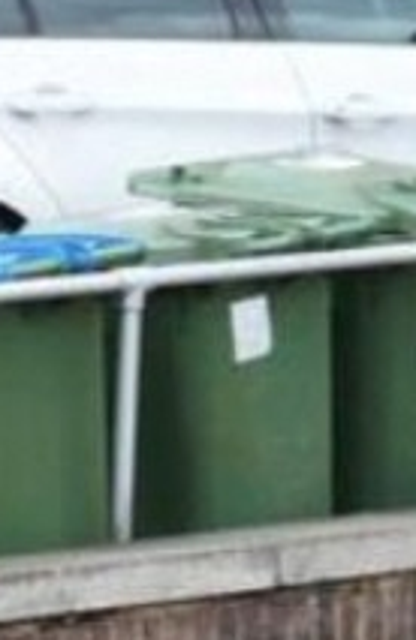

2025-12-03 18:54:21,535 - base.py - 780 - INFO - ALL tokens: 1044, Available tokens: 57838



[ANSWER]
Okay, let's see. The user asked where the picture was taken. The original image is of the Hop Inn pub. I first looked at the details: UK license plates, the phone number starting with 02380, which I thought was Southampton. Then I tried to zoom in on the phone number sign to get the exact number for verification.

But the tool response came back as a zoomed-in image of green bins, which isn't helpful. That means the previous zoom attempt was on the wrong area. The phone number signs are the green banners on the building. Let me check the original image again. There are two green signs on the building with "HOP INN" and the phone number. The correct area to zoom would be one of those signs.

So I need to adjust the bounding box. The signs are on the left and right sides of the entrance. Let me pick the left one. The coordinates should be around where the green sign is. Let me estimate the bbox. The left sign is on the brick wall, so maybe [220, 630, 275, 775]. Wait, in the ori

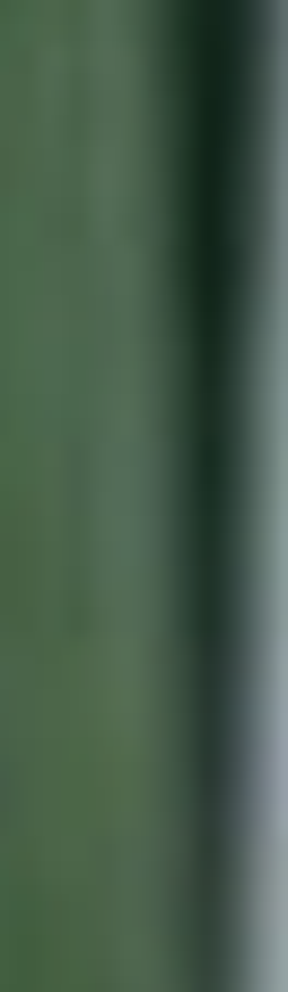

2025-12-03 18:54:28,732 - base.py - 780 - INFO - ALL tokens: 1612, Available tokens: 57838



[ANSWER]
Okay, let's see. The user asked where the picture was taken. I started by looking at the image details. The building is called Hop Inn, has UK license plates, and a phone number starting with 02380. I thought that area code is for Southampton, so I tried to zoom in on the phone number sign to confirm the digits.

First, I used the image_zoom_in_tool on the sign with bbox [665,703,721,835], but the result was a blurry image of green bins. Then I tried another bbox [215,625,278,778], which also gave a blurry image. Hmm, maybe the phone number isn't visible in those areas. Wait, the original image has two green signs with "02380 557723" on them. Maybe I should check those signs instead.

Wait, the user's first tool call was on the sign that says "DARTS POOL TEA/COFFEE..." but the phone number is on the green signs. Let me check the original image again. The green signs on the building's front have "02380 557723". So maybe the correct bbox for the phone number is on those green s

In [6]:
messages = []
messages += [
    {"role": "user", "content": [
        {"image": "/diancpfs/user/guobin/Qwen3-VL/cookbooks/assets/qwenagent/hopinn.jpg"},
        {"text": "Where was the picture taken?"}
    ]}
]

response_plain_text = ''
for ret_messages in agent.run(messages, stream=False):
    # `ret_messages` will contain all subsequent messages, consisting of interleaved assistant messages and tool responses
    response_plain_text = multimodal_typewriter_print(ret_messages, response_plain_text)